In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Predicting the Potentially Hazardous Asteroid to Earth using Machine Learning/Data set/Data of 27_04_2021.csv")

In [3]:
data.head()

,full_name,H,e,a,q,i,moid,class,pha
0,433 Eros (A898 PA),10.40,0.222994,1.458167,1.133005,10.830513,0.148573,AMO,N
1,719 Albert (A911 TB),15.51,0.546721,2.638378,1.195922,11.570400,0.201325,AMO,N
2,887 Alinda (A918 AA),13.84,0.570422,2.473534,1.062575,9.393848,0.081753,AMO,N
3,1036 Ganymed (A924 UB),9.30,0.533095,2.665194,1.244392,26.676143,0.343891,AMO,N
4,1221 Amor (1932 EA1),17.39,0.435488,1.919166,1.083392,11.880444,0.106469,AMO,N


In [4]:
data=data.iloc[:,1:]

In [5]:
data.head()

,H,e,a,q,i,moid,class,pha
0,10.40,0.222994,1.458167,1.133005,10.830513,0.148573,AMO,N
1,15.51,0.546721,2.638378,1.195922,11.570400,0.201325,AMO,N
2,13.84,0.570422,2.473534,1.062575,9.393848,0.081753,AMO,N
3,9.30,0.533095,2.665194,1.244392,26.676143,0.343891,AMO,N
4,17.39,0.435488,1.919166,1.083392,11.880444,0.106469,AMO,N


# **Over view on the dataset**

In [6]:
print("No. of columns = ",data.shape[0])
print("No. of rows = ",data.shape[1])

No. of columns =  25708
No. of rows =  8


In [7]:
data.dtypes

H        float64
e        float64
a        float64
q        float64
i        float64
moid     float64
class     object
pha       object
dtype: object

# **Univarient analysis**

In [11]:
def univarient_analysis_cat_data(feature):
  print(data[feature].value_counts())
  data[feature].value_counts(normalize=True).plot.bar(title = feature)

analysis on **pha**

N    23544
Y     2163
Name: pha, dtype: int64


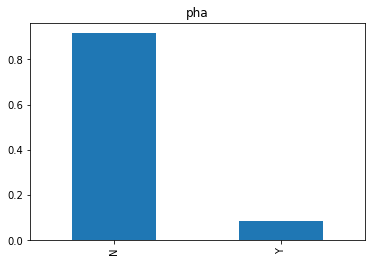

In [12]:
univarient_analysis_cat_data('pha')

analysis on **orbit class**

APO    14301
AMO     9407
ATE     1977
IEO       23
Name: class, dtype: int64


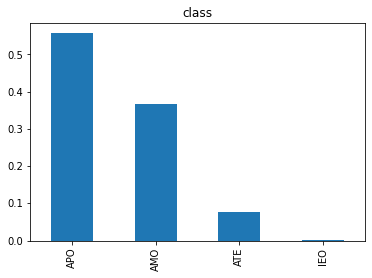

In [13]:
univarient_analysis_cat_data('class')

In [16]:
def univarient_analysis_num_data(feature):
  plt.figure(1)
  plt.subplot(121)
  sns.distplot(data[feature]);
  
  plt.subplot(122)
  data[feature].plot.box(figsize=(16,5))
  plt.show()

analysis on **H**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


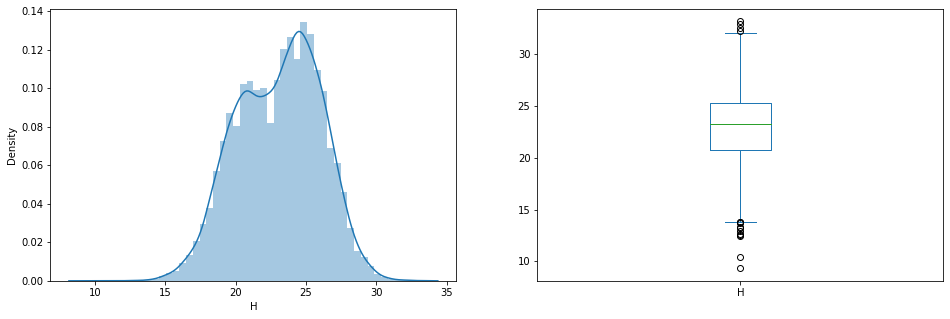

In [17]:
univarient_analysis_num_data('H')

analysis on **e**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


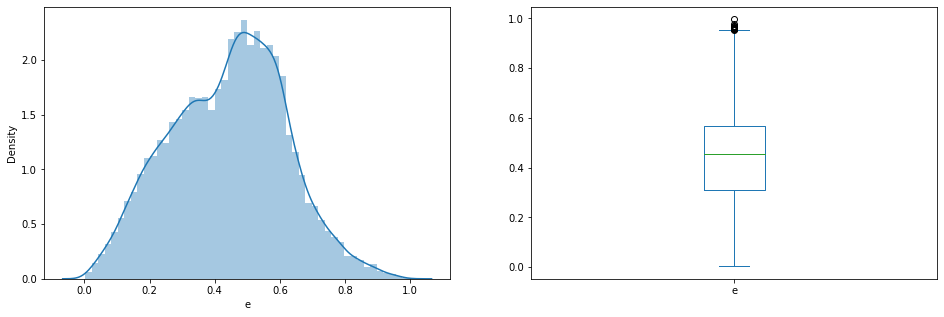

In [18]:
univarient_analysis_num_data('e')

analysis on **a**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


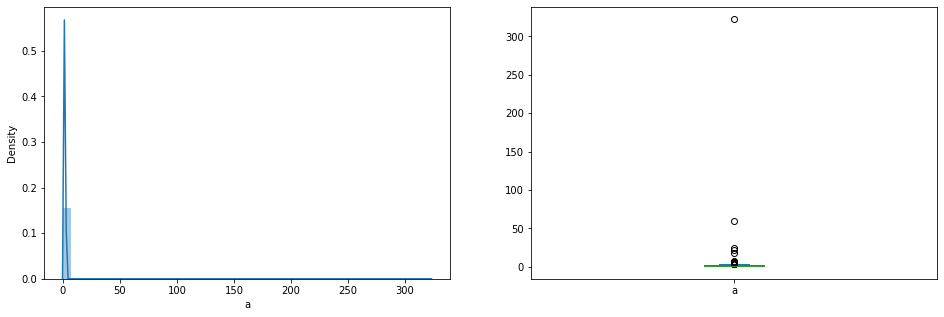

In [19]:
univarient_analysis_num_data('a')

analysis on **i**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


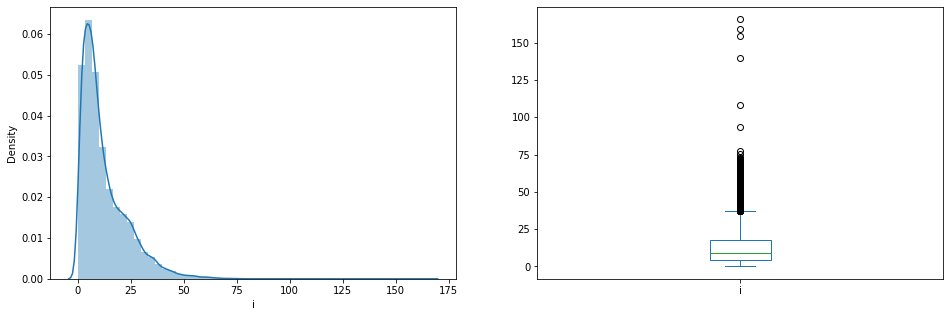

In [20]:
univarient_analysis_num_data('i')

analysis on **moid**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


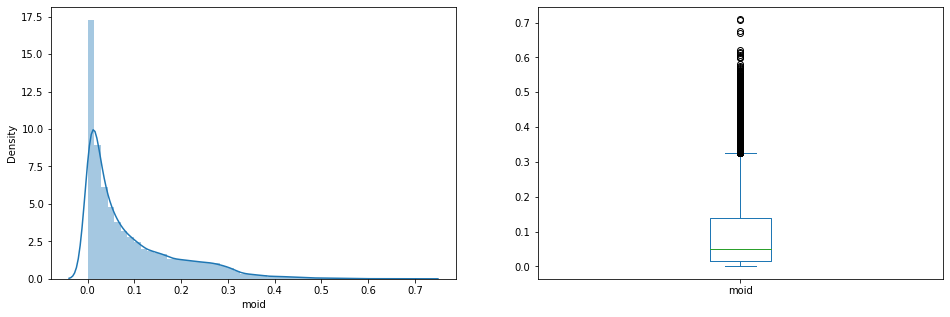

In [21]:
univarient_analysis_num_data('moid')

# **Bi-variant analysis**

pha        N     Y
class             
AMO     9271   135
APO    12454  1847
ATE     1802   175
IEO       17     6


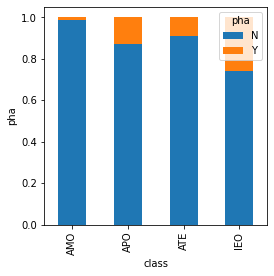

In [ ]:
print(pd.crosstab(data["class"],data["pha"]))
a=pd.crosstab(data["class"],data["pha"])
a.div(a.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("class")
plt.ylabel("pha")
plt.show()

# **Correlation**

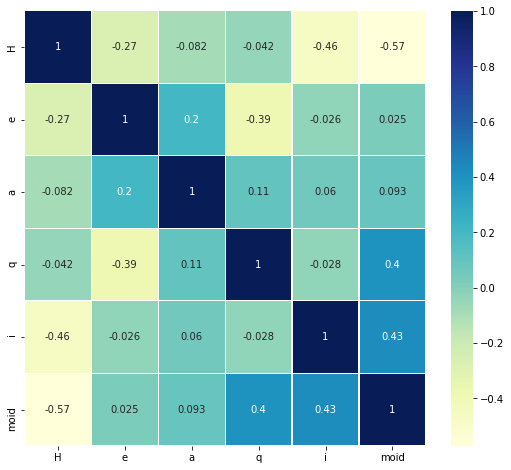

In [ ]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot = True)

# **Missing values**

In [ ]:
data.isnull().sum()

H        7
e        0
a        0
q        0
i        0
moid     1
class    0
pha      1
dtype: int64

In [ ]:
data_new = data.dropna()
data_new.reset_index(drop=True)

,H,e,a,q,i,moid,class,pha
0,10.400,0.222994,1.458167,1.133005,10.830513,0.148573,AMO,N
1,15.510,0.546721,2.638378,1.195922,11.570400,0.201325,AMO,N
2,13.840,0.570422,2.473534,1.062575,9.393848,0.081753,AMO,N
3,9.300,0.533095,2.665194,1.244392,26.676143,0.343891,AMO,N
4,17.390,0.435488,1.919166,1.083392,11.880444,0.106469,AMO,N
...,...,...,...,...,...,...,...,...
25695,23.963,0.578658,2.169661,0.914170,5.688374,0.026381,APO,N
25696,28.852,0.304648,1.235505,0.859111,1.205673,0.000374,APO,N
25697,25.677,0.429141,1.575648,0.899473,14.354920,0.004392,APO,N
25698,23.618,0.539771,1.932266,0.889284,10.707926,0.012078,APO,N


In [ ]:
data_new.isnull().sum()

H        0
e        0
a        0
q        0
i        0
moid     0
class    0
pha      0
dtype: int64